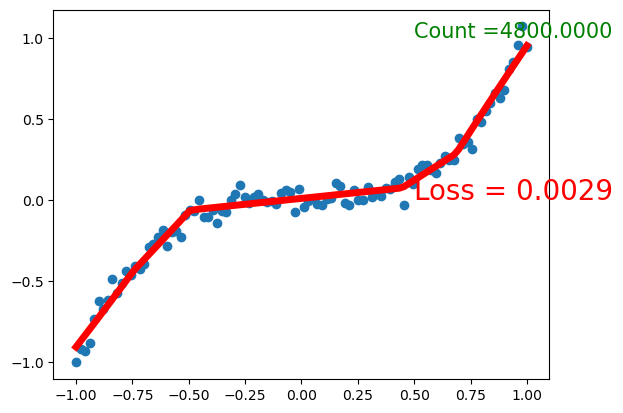

time cost 11.754536151885986 s
torch.Size([100, 1]) torch.Size([100, 1])
100


In [2]:
#导入Pytorch必须库
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

#绘制动态度库导入
import matplotlib.pyplot as plt
import time
from IPython import display 

time_start=time.time()
x = torch.unsqueeze(torch.linspace(-1,1,100),dim=1)
y = x.pow(3)+0.05*torch.randn(x.size())
x , y =(Variable(x),Variable(y))
torch.set_num_threads(100)  # 设置pytorch并行线程数

#模型建立
class Net(nn.Module):
    def __init__(self,n_input,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden1 = nn.Linear(n_input,n_hidden)
        self.hidden2 = nn.Linear(n_hidden,n_hidden)
        self.predict = nn.Linear(n_hidden,n_output)
    def forward(self,input):
        out = self.hidden1(input)
        out = F.relu(out)#激活函数
        out = self.hidden2(out)
        out = F.sigmoid(out)#激活函数
        out =self.predict(out)
        return out

net = Net(1,20,1)
print(net)

#定义优化器和损失函数
learning_rate = 1e-1
optimizer = torch.optim.SGD(net.parameters(),lr = learning_rate)
loss_func = torch.nn.MSELoss()

#训练并绘制动态度
for t in range(5000):
    prediction = net(x)
    loss = loss_func(prediction,y)    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if t%200 ==0:
        plt.cla()
        display.clear_output(wait=True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss = %.4f' % loss.data, fontdict={'size': 20, 'color': 'red'})
        plt.text(0.5, 1, 'Count =%.4f' % t,fontdict={'size':15,'color':'green'})
        plt.pause(0.0002)

time_end=time.time()
print('time cost',time_end-time_start,'s')
print(x.size(),y.size())
print(torch.get_num_threads())

In [4]:
from libs.painter import *

hello()

say hello
